In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df_1=pd.read_excel('통합 문서1.xlsx')
df_2=pd.read_excel("일본 수출액 1980~2001.xlsx")
df_3=pd.read_excel('국제유가 2000~2021.xlsx')
df_2=df_2.transpose()
df_2=df_2.reset_index()
df_2.drop(0, axis=0,inplace=True)
df_2.rename(columns={'index':'기간',1:'수출액'},inplace=True)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df_2['기간']=pd.to_datetime(df_2['기간'])

In [4]:
df_2['수출액']=df_2['수출액']*1000


In [5]:
from sklearn import preprocessing

In [6]:
!pip install openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
df_all_1 = df_1.copy()


In [8]:
df_all_1=pd.concat([df_all_1,df_3.drop(['년도'], axis=1)],axis=1)


In [9]:
df_2.reset_index(inplace=True)


In [10]:
df_all_1['일본과거수출액']=df_2['수출액']


In [11]:
df_all_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기간         264 non-null    datetime64[ns]
 1   한국 수출금액    264 non-null    int64         
 2   한국의대중국수출   264 non-null    int64         
 3   한국의대미국수출   264 non-null    int64         
 4   한국의대베트남수출  264 non-null    int64         
 5   한국의대홍콩수출   264 non-null    int64         
 6   한국의대일본수출   264 non-null    int64         
 7   두바이유       264 non-null    float64       
 8   브렌트유       264 non-null    float64       
 9   서부텍사스중질유   264 non-null    float64       
 10  일본과거수출액    264 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 22.8+ KB


In [12]:
df_all_1=df_all_1.astype({'일본과거수출액':'float64'})


In [13]:
df_all_1.corr(method='pearson', min_periods=1)


,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,두바이유,브렌트유,서부텍사스중질유,일본과거수출액
한국 수출금액,1.000000,0.986205,0.883147,0.782272,0.898647,0.788045,0.666850,0.646012,0.595222,0.830371
한국의대중국수출,0.986205,1.000000,0.865766,0.786733,0.905776,0.750390,0.642421,0.620352,0.568208,0.840734
한국의대미국수출,0.883147,0.865766,1.000000,0.897149,0.828548,0.560782,0.351308,0.328573,0.279063,0.785905
한국의대베트남수출,0.782272,0.786733,0.897149,1.000000,0.827196,0.354092,0.153356,0.121639,0.066312,0.762865
한국의대홍콩수출,0.898647,0.905776,0.828548,0.827196,1.000000,0.630457,0.456478,0.434715,0.372287,0.735185
한국의대일본수출,0.788045,0.750390,0.560782,0.354092,0.630457,1.000000,0.862311,0.861803,0.800735,0.479597
두바이유,0.666850,0.642421,0.351308,0.153356,0.456478,0.862311,1.000000,0.996699,0.977844,0.371899
브렌트유,0.646012,0.620352,0.328573,0.121639,0.434715,0.861803,0.996699,1.000000,0.983405,0.341595
서부텍사스중질유,0.595222,0.568208,0.279063,0.066312,0.372287,0.800735,0.977844,0.983405,1.000000,0.307975
일본과거수출액,0.830371,0.840734,0.785905,0.762865,0.735185,0.479597,0.371899,0.341595,0.307975,1.000000


In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [16]:
from sklearn.metrics import mean_squared_error


In [17]:
df_all_2=df_all_1.drop([df_all_1.columns[0],'한국 수출금액'], axis=1)


In [20]:
label1=df_all_1['한국 수출금액']

In [22]:
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(df_all_2)
df_scaled = scaler.transform(df_all_2)

# transform() 결과는 ndarraay, 데이터 프레임으로 변환
df_all_scaled = pd.DataFrame(df_scaled)

In [23]:
train_x, test_x, train_y, test_y = train_test_split(df_all_scaled, label1, test_size=0.2, random_state=42)


In [24]:
df_all_scaled


,0,1,2,3,4,5,6,7,8
0,0.000000,0.052474,0.002700,0.029286,0.186491,0.051276,0.063578,0.072631,0.001235
1,0.002687,0.043965,0.003181,0.039095,0.174155,0.062389,0.081243,0.095659,0.029641
2,0.014330,0.104167,0.010015,0.059744,0.273487,0.049171,0.040247,0.066524,0.040517
3,0.009333,0.066008,0.013458,0.048341,0.198118,0.041340,0.034497,0.056949,0.015473
4,0.030341,0.137965,0.013506,0.053956,0.231263,0.064242,0.081160,0.083939,0.021746
...,...,...,...,...,...,...,...,...,...
259,0.896420,0.833844,0.861163,0.649629,0.550941,0.433359,0.432881,0.409871,0.592813
260,0.925529,0.876745,0.906682,0.752395,0.557709,0.488507,0.495625,0.463767,0.644495
261,0.934311,0.889452,0.871056,0.490351,0.585351,0.539362,0.538538,0.534252,0.606282
262,0.995037,0.899706,0.974878,0.606464,0.659860,0.446998,0.420465,0.390723,0.662599


In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 52)                520       
                                                                 
 dense_29 (Dense)            (None, 39)                2067      
                                                                 
 dense_30 (Dense)            (None, 26)                1040      
                                                                 
 dense_31 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,654
Trainable params: 3,654
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 27ms/step - loss: 1426883351239142146048.0000 - val_loss: 1390099356857663488000.0000
Epoch 2/40
7/7 [==============================] - 0s 6ms/step - loss: 1426883210501653790720.0000 - val_loss: 1390098934645198422016.0000
Epoch 3/40
7/7 [==============================] - 0s 7ms/step - loss: 1426881803126770237440.0000 - val_loss: 1390096119895431315456.0000
Epoch 4/40
7/7 [==============================] - 0s 7ms/step - loss: 1426876595839701090304.0000 - val_loss: 1390086127533758087168.0000
Epoch 5/40
7/7 [==============================] - 0s 6ms/step - loss: 1426860129553563516928.0000 - val_loss: 1390057557823621955584.0000
Epoch 6/40
7/7 [==============================] - 0s 6ms/step - loss: 1426817908307056918528.0000 - val_loss: 1389990285304188108800.0000
Epoch 7/40
7/7 [==============================] - 0s 7ms/step - loss: 1426720517965115031552.0000 - val_loss: 1389849266340856070144.0000
Epoch 8/40
7/7 [============================

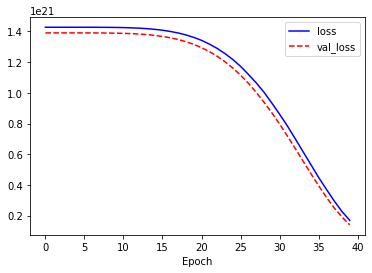

In [49]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

history = model.fit(train_x, train_y, epochs=40, batch_size=32, validation_data=(test_x, test_y))

# 4.15 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

history = model.fit(train_x, train_y, epochs=40, batch_size=32, validation_data=(test_x, test_y))

# 4.15 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

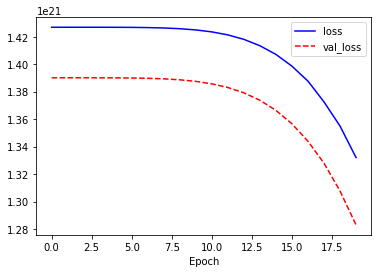

In [41]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()